In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import cv2

plt.rcParams["figure.figsize"] = (20,12)
sns.set_theme(style="white", palette="pastel")


In [2]:
# read dataset
data = pd.read_csv("./inputs/P5/digits.csv").sample(frac=1).reset_index(drop=True)
data = np.array(data)
print("Original dataset shape: ",data.shape)


Original dataset shape:  (1797, 64)


In [3]:
# ------------------------------------------------------ D: B ------------------------------------------------------#
search = GridSearchCV(KernelDensity(),  {'bandwidth': np.linspace(0.1, 5, 100)}, cv=5)
search.fit(data)
search.best_params_

{'bandwidth': 1.6838383838383841}

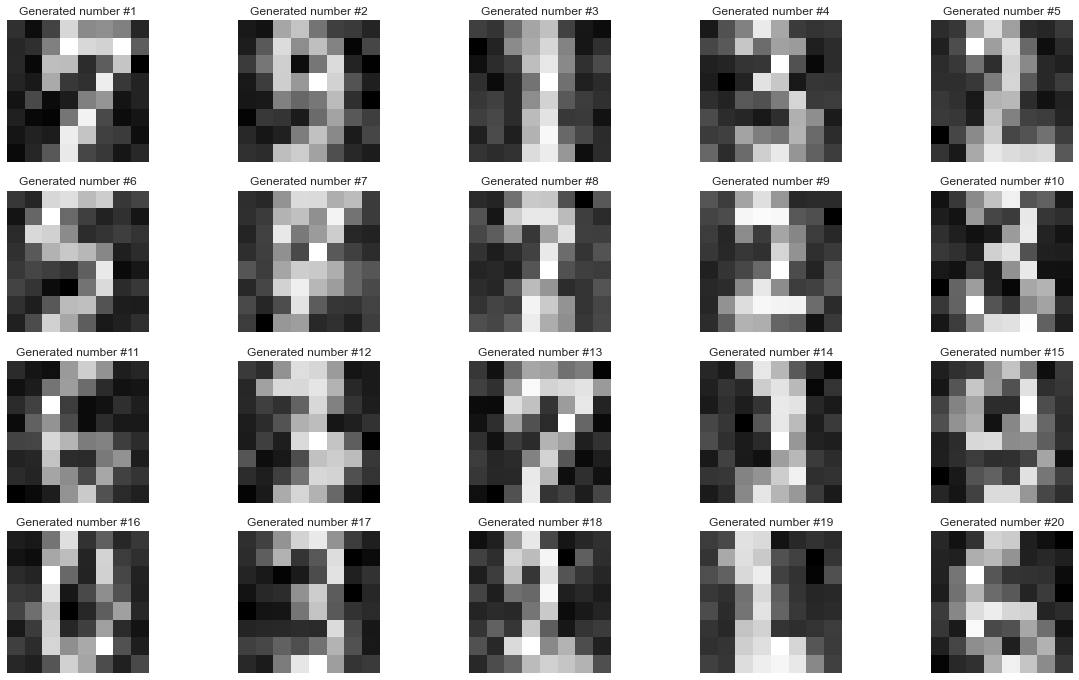

In [4]:
# ------------------------------------------------------ D: C ------------------------------------------------------#
kde = KernelDensity(kernel='gaussian', bandwidth=search.best_params_["bandwidth"]).fit(data)
s = kde.sample(20)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(np.resize(s[i],(8,8)), cmap=plt.get_cmap('gray'))
    plt.title("Generated number #{0}".format(i+1))
plt.show()
